### Toy Example -  SVM

In [ ]:
# from sklearn import preprocessing 
# import numpy as np
# x_train = np.array([[1, -1, 2], [2, 0, 0], [0, 1, -1]], dtype=np.float64)
# x_test = np.array([[-1, 1, 0]], dtype=np.float64)
# # facem statisticile pe datele de antrenare
# scaler = preprocessing.StandardScaler()
# scaler.fit(x_train)
# # afisam media
# print(scaler.mean_) # => [1. 0. 0.33333333]
# # afisam deviatia standard
# print(scaler.scale_) # => [0.81649658 0.81649658 1.24721913]
# # scalam datele de antrenare
# scaled_x_train = scaler.transform(x_train)
# print(scaled_x_train) # => [[0. -1.22474487 1.33630621]
# # [1.22474487 0. -0.26726124]
# # [-1.22474487 1.22474487 -1.06904497]]
# # scalam datele de test
# scaled_x_test = scaler.transform(x_test)
# print(scaled_x_test) # => [[-2.44948974 1.22474487 -0.26726124]]

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import svm # import the library
from sklearn import preprocessing
from collections import defaultdict

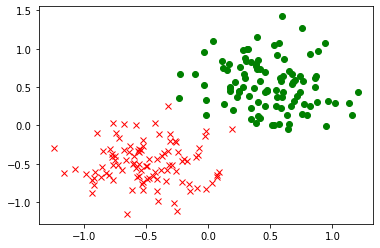

In [2]:
# load toy data
training_data = np.load('data/svm_train_data.npy')
training_labels = np.load('data/svm_train_labels.npy')

# plot the data
for i in range(training_data.shape[0]):
    if training_labels[i] == 0:
        plt.plot(training_data[i, 0], training_data[i, 1], 'og')
    else:
        plt.plot(training_data[i, 0], training_data[i, 1], 'xr')
plt.show()

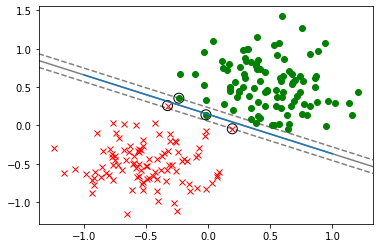

In [8]:
# train a SVM model
C_param = 100 # change this parameter to [0.01, 1, 10, 1000] and try to explain the effect of the parameter
svm_model = svm.SVC(C=C_param, kernel="linear") # define the model
svm_model.fit(training_data, training_labels) # train
predicted_labels_train = svm_model.predict(training_data) # predit

X = np.linspace(-1, 1, 1000)
Y = -(X * svm_model.coef_[0, 0] + svm_model.intercept_) / svm_model.coef_[0, 1]
for i in range(training_data.shape[0]):
    if training_labels[i] == 0:
        plt.plot(training_data[i, 0], training_data[i,1],'og')
    else:
        plt.plot(training_data[i, 0], training_data[i, 1],'xr')
        
        
        
# plotting
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')        
        
plt.plot(X,Y) 
plt.show()


2.Definiți funcția normalize_data(train_data, test_data, type=None) care primește ca parametri datele de antrenare, respectiv de testare și tipul de normalizare ({None, ‘standard’, ‘l1’, ‘l2’}) și întoarce aceste date normalizate.

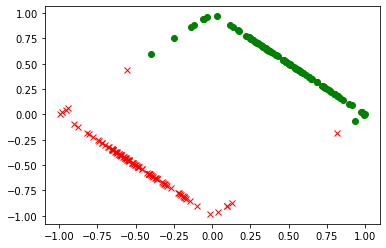

In [4]:
#Ex 2
def normalize_data(train_data, test_data, type=None):
    if type == 'standard':
        scaler = preprocessing.StandardScaler()
        scaler.fit(train_data)# afisam media
        scaled_train = scaler.transform(train_data)
        scaled_test = scaler.transform(test_data)
        return scaled_train, scaled_test
    if type == 'l1':
        norm_train = preprocessing.normalize(train_data, norm='l1')
        norm_test = preprocessing.normalize(test_data, norm='l1')
        return norm_train, norm_test
    if type == 'l2':
        norm_train = preprocessing.normalize(train_data, norm='l2')
        norm_test = preprocessing.normalize(test_data, norm='l2')
        return norm_train, norm_test
    return train_data, test_data

normalized_data, tmp = normalize_data(training_data, training_data, 'l1')#for this example we only have the train data
for i in range(normalized_data.shape[0]):
    if training_labels[i] == 0:
        plt.plot(normalized_data[i, 0], normalized_data[i, 1], 'og')
    else:
        plt.plot(normalized_data[i, 0], normalized_data[i, 1], 'xr')
plt.show()

        
        
        

3. Definiți clasa Bag_of_Words în al cărui constructor se inițializează vocabularul (un dicționar gol). În cadrul ei implementați metoda build_vocabulary(self, data) care primește ca parametru o listă de mesaje(listă de liste de strings) și construiește vocabularul pe baza acesteia. Cheile dicționarului sunt reprezentate de cuvintele din eseuri, iar valorile de id-urile unice atribuite cuvintelor. Pe lângă vocabularul pe care-l construiți, rețineți și o listă cu cuvintele în ordinea adăugării în vocabular.
Afișați dimensiunea vocabularul construit (9522).
OBS. Vocabularul va fi construit doar pe baza datelor din setul de antrenare.

In [5]:
#Ex 3
class Bag_of_Words:
    index_counter = -1
    def __init__(self):
        self.words = []
        self.vocabulary = defaultdict(None)
        
    def build_vocabulary(self, data):
        # primește ca parametru o listă de mesaje(listă de liste de strings)
        # și construiește vocabularul pe baza acesteia. 
        #   'cuvant1': 0,
        #   'cuvant2': 1,
        #   'cuvant3': 2,
        #    ...
        for message in data:
            for word in message:
                if word not in self.vocabulary:
                    self.words.append(word)
                    self.index_counter += 1
                    self.vocabulary[word] = self.index_counter
                    
                    
    # 4. Definiți metoda get_features(self, data) care primește
    # ca parametru o listă de mesaje de dimensiune 
    # 𝑛𝑢𝑚_𝑠𝑎𝑚𝑝𝑙𝑒𝑠(listă de liste de strings) și returnează 
    # o matrice de dimensiune (𝑛𝑢𝑚_𝑠𝑎𝑚𝑝𝑙𝑒𝑠 x 𝑑𝑖𝑐𝑡𝑖𝑜𝑛𝑎𝑟𝑦_𝑙𝑒𝑛𝑔𝑡ℎ) 
    # definită astfel:
# 𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠(𝑠𝑎𝑚𝑝𝑙𝑒𝑖𝑑𝑥,𝑤𝑜𝑟𝑑𝑖𝑑𝑥)=𝑛𝑢𝑚𝑎𝑟𝑢𝑙 𝑑𝑒 𝑎𝑝𝑎𝑟𝑖𝑡𝑖𝑖 𝑎𝑙 𝑐𝑢𝑣𝑎𝑛𝑡𝑢𝑙𝑢𝑖 𝑐𝑢 𝑖𝑑−𝑢𝑙 𝑤𝑜𝑟𝑑_𝑖𝑑𝑥 𝑖𝑛 𝑑𝑜𝑐𝑢𝑚𝑒𝑛𝑡𝑢𝑙 𝑠𝑎𝑚𝑝𝑙𝑒_𝑖𝑑𝑥
    
                    
    #Ex4   se numara de cate ori apare fiecare cuvant in fiec mesaj
    # data = [
#     ['cuvant1', 'cuvant2', 'cuvant1'],
#     ['cuvant3', 'cuvant2', 'cuvant4'],
#     ['cuvant1', 'cuvant5']
#       ]
    # features =
#     [
#     [2, 1, 0, 0, 0],
#     [0, 1, 1, 0, 1],
#     [1, 0, 0, 0, 1]
#     ]  cuvant1 apare de 2 ori pe linia 1 din data si cvant2 o data 

    def get_features(self, data):
        features = np.array([[0 for _ in range(len(self.vocabulary))] for _ in range(len(data))])
        for i in range(len(data)):  #se parcurge fiecare  mesaj din data
            for word in data[i]: 
                if word in self.vocabulary:
                    features[i][self.vocabulary[word]] += 1
                
        return features
      
#Ex 5. Cu ajutorul funcțiilor definite anterior, obțineți reprezentările BOW 
# pentru mulțimea de antrenare și testare, apoi normalizați-le
# folosind norma “L2”.

tr_data = np.load('./data/training_sentences.npy', allow_pickle=True)
tr_labels = np.load('./data/training_labels.npy', allow_pickle=True)
tst_data = np.load('./data/test_sentences.npy', allow_pickle=True)
tst_labels = np.load('./data/test_labels.npy', allow_pickle=True)

bow = Bag_of_Words()    #se creeaza instanta clasei BOW
bow.build_vocabulary(tr_data)
features_train = bow.get_features(tr_data)
features_test = bow.get_features(tst_data)

norm_train_data, norm_test_data = normalize_data(features_train, features_test, 'l2')

print(len(bow.vocabulary)) #Ex3 resultat

9522


6. Antrenați un SVM cu kernel linear care să clasifice mesaje în mesaje spam/non-spam. Pentru parametrul C setați
 valoarea 1. Calculați acuratețea și F1-score pentru mulțimea de testare.

Afișați cele mai negative (spam) 10 cuvinte și cele mai pozitive (non-spam) 10 cuvinte.

the first 10 negative words are ['Text' 'To' 'mobile' 'CALL' 'FREE' 'txt' '&' 'Call' 'Txt' 'STOP']
the first 10 positive words are ['&lt#&gt' 'me' 'i' 'Going' 'him' 'Ok' 'I' 'Ill' 'my' 'Im']

explicatii:
 Un C mai mic va permite modelelor să aibă erori de 
clasificare pentru a obține o margină de separare mai 
mare și a evita suprapunerea excesivă a claselor. Pe de 
altă parte, un C mai mare va penaliza mai mult erorile de
clasificare și va încerca să clasifice corect cât mai multe 
exemple de antrenare, chiar dacă acest lucru poate duce 
la o margină de separare mai mică.

 O valoare prea mică a lui C poate duce la suprapunerea 
claselor și la un risc mai mare de suprapunere, în timp 
ce o valoare prea mare a lui C poate duce la o clasificare '
excesiv de rigidă și la subaprendere.

Dacă valoarea parametrului C este mică, atunci SVM va fi mai permisiv în clasificarea exemplelor de antrenare și va încerca să obțină o margine de separare cât mai mare. Acest lucru înseamnă că va permite un grad mai mare de suprapunere între clasele de antrenare și poate clasifica eronat unele exemple de antrenare.

Cu o margine de separare mai mare în modelele de antrenare, există o șansă mai mare ca modelele să generalizeze bine și să prezică corect exemplele de testare. Deoarece SVM permite erori de clasificare pe exemplul de antrenare, un C mic va permite modelelor să aibă mai multe erori de clasificare, ceea ce poate ajuta la evitarea suprapunerii excesive și la o mai bună generalizare.

Dacă valoarea parametrului C este mai mare, SVM va fi mai "sever" cu exemplele de antrenare și va încerca să clasifice corect cât mai multe exemple de antrenare. Acest lucru înseamnă că SVM va încerca să obțină o margine de separare mai mică și să reducă eroarea de clasificare pe setul de antrenare.

Cu o margine de separare mai mică, există riscul ca SVM să devină mai sensibil la zgomotul sau variabilitatea din setul de antrenare. Acest lucru poate duce la o supraspecializare sau overfitting, ceea ce înseamnă că SVM poate clasifica incorect exemplele de testare, deoarece a învățat caracteristici specifice și unice ale setului de antrenare.

În general, o valoare mai mare a parametrului C poate duce la o performanță mai bună pe setul de antrenare, dar există riscul de a obține o performanță scăzută pe setul de testare. 

Cu toate acestea, trebuie să fie o balanță între obținerea unei margini de separare mai mari și clasificarea corectă a exemplelor de antrenare. Dacă valoarea parametrului C este prea mică, există riscul de a subaprenda și de a clasifica incorect și exemplele de antrenare și cele de testare. Este important să găsim o valoare optimă pentru parametrul C prin ajustări și experimente pentru a obține cea mai bună performanță a modelului SVM.

In [ ]:
#Ex 6

C_param = 1 
#se defineste un support vector classifier 
svm_model = svm.SVC(C=C_param, kernel="linear") # define the model
svm_model.fit(norm_train_data, tr_labels) # train

predicted_labels_train = svm_model.predict(norm_train_data) # predict train data
predicted_labels_test = svm_model.predict(norm_test_data) # predict train data

score_train = svm_model.score(norm_train_data, tr_labels)
score_test = svm_model.score(norm_test_data, tst_labels)
print(score_train)
print(score_test)



0.9938403856454204
0.9842391304347826


In [7]:
coef = svm_model.coef_.ravel()
best = np.argsort(coef)[-10:]
worst = np.argsort(coef)[:10]
print("the first 10 negative words are:")
for index in best:
    print(bow.words[index])
print("\nthe first 10 positive words are:")
for index in worst:
    print(bow.words[index])

the first 10 negative words are:
Text
To
mobile
CALL
FREE
txt
&
Call
Txt
STOP

the first 10 positive words are:
&lt#&gt
me
i
Going
him
Ok
I
Ill
my
Im
